In [1]:
import os

from keras.layers import Input
from keras.optimizers import adam
from keras.callbacks import ModelCheckpoint, CSVLogger, ReduceLROnPlateau

from FullPointNet import FullPointNet
from losses import level_loss
from puppet_dataset_keypoint.puppet import PuppetDataset
from DataGenerator import DataGenerator
from EvalPuppet import EvalPuppet
from TestDataGenerator import TestDataGenerator
from visualize import display_my_masks

Using TensorFlow backend.


In [2]:
TRAINING_LOG = os.path.join('logdir', "training2.csv")

def create_model():
    input_image = Input((None, None, 3))
    return FullPointNet(input_image)

# create the model
model = create_model()
print('model created!')

model created!


In [3]:
train_batch_size = 6
test_batch_size = 6
height = 48
width = 48
epoch_samples = 80

In [4]:
# create a generator for training data
train_generator = DataGenerator(PuppetDataset, kpn=4,
                                batch_size=train_batch_size,
                                height=height, width=width)
test_generator = TestDataGenerator(PuppetDataset, kpn=4,
                                   batch_size=test_batch_size,
                                   height=height, width=width)

In [5]:
# first stage training
model.compile(loss={'p1': level_loss(), 'p2': level_loss(), 'p3': level_loss()},
              loss_weights={'p1': 0.7, 'p2': 0.2, 'p3': 0.1},
              optimizer=adam(lr=1e-2))
model.fit_generator(
    generator=train_generator,
    steps_per_epoch=epoch_samples // train_batch_size,
    epochs=20,
    callbacks=[
        ModelCheckpoint(os.path.join('savedir', 'a-first-best.h5'), monitor='loss',
                        verbose=1, save_best_only=True),
        ReduceLROnPlateau(monitor='loss', factor=0.1, patience=2, verbose=1,
                          mode='auto', epsilon=0.0001, cooldown=0, min_lr=1e-6),
        CSVLogger(TRAINING_LOG, append=True),
    ]
)

Epoch 1/20
13/13 [==============================] - 93s 7s/step - loss: 12.7548 - p1_loss: 12.7548 - p2_loss: 12.7548 - p3_loss: 12.7548
Epoch 2/20
13/13 [==============================] - 66s 5s/step - loss: 13.0475 - p1_loss: 13.0475 - p2_loss: 13.0475 - p3_loss: 13.0475
Epoch 3/20
13/13 [==============================] - 66s 5s/step - loss: 12.6097 - p1_loss: 12.6097 - p2_loss: 12.6097 - p3_loss: 12.6097
Epoch 4/20
 8/13 [=================>............] - ETA: 25s - loss: 12.9466 - p1_loss: 12.9466 - p2_loss: 12.9466 - p3_loss: 12.9466

KeyboardInterrupt: 

In [5]:
# first stage training
model.compile(loss={'p1': level_loss(), 'p2': level_loss(), 'p3': level_loss()},
              loss_weights={'p1': 0.7, 'p2': 0.2, 'p3': 0.1},
              optimizer=adam(lr=1e-2))
model.fit_generator(
    generator=train_generator,
    steps_per_epoch=epoch_samples // train_batch_size,
    epochs=20,
    callbacks=[
        ModelCheckpoint(os.path.join('savedir', 'a-first-best.h5'), monitor='loss',
                        verbose=1, save_best_only=True),
        ReduceLROnPlateau(monitor='loss', factor=0.1, patience=2, verbose=1,
                          mode='auto', epsilon=0.0001, cooldown=0, min_lr=1e-6),
        CSVLogger(TRAINING_LOG, append=True),
    ]
)

Epoch 1/20
20/20 [==============================] - 62s - loss: 2.7384 - p1_loss: 2.9093 - p2_loss: 2.6226 - p3_loss: 1.7731    
Epoch 2/20
20/20 [==============================] - 37s - loss: 2.3283 - p1_loss: 2.8113 - p2_loss: 1.3903 - p3_loss: 0.8231    
Epoch 3/20
20/20 [==============================] - 36s - loss: 1.1513 - p1_loss: 1.3668 - p2_loss: 0.6315 - p3_loss: 0.6823    
Epoch 4/20
20/20 [==============================] - 36s - loss: 0.9498 - p1_loss: 1.1105 - p2_loss: 0.5476 - p3_loss: 0.6298    
Epoch 5/20
20/20 [==============================] - 36s - loss: 0.7649 - p1_loss: 0.8664 - p2_loss: 0.5243 - p3_loss: 0.5352    
Epoch 6/20
20/20 [==============================] - 36s - loss: 0.6164 - p1_loss: 0.6722 - p2_loss: 0.4970 - p3_loss: 0.4642    
Epoch 7/20
20/20 [==============================] - 36s - loss: 0.5616 - p1_loss: 0.6131 - p2_loss: 0.4511 - p3_loss: 0.4216    
Epoch 8/20
20/20 [==============================] - 36s - loss: 0.5132 - p1_loss: 0.5508 - p2_los

KeyboardInterrupt: 

In [8]:
model.load_weights(os.path.join('savedir', 'a-second-best.h5'))

In [7]:
# second stage training
model.compile(loss={'p1': level_loss(), 'p2': level_loss(), 'p3': level_loss()},
              loss_weights={'p1': 0.1, 'p2': 0.2, 'p3': 0.7},
              optimizer=adam(lr=1e-3))
model.fit_generator(
    generator=train_generator,
    steps_per_epoch=epoch_samples // train_batch_size,
    epochs=20,
    callbacks=[
        ModelCheckpoint(os.path.join('savedir', 'a-second-best.h5'), monitor='loss',
                        verbose=1, save_best_only=True),
        ReduceLROnPlateau(monitor='loss', factor=0.1, patience=2, verbose=1,
                          mode='auto', epsilon=0.001, cooldown=0, min_lr=1e-6),
        CSVLogger(TRAINING_LOG, append=True),
    ]
)

Epoch 1/20
20/20 [==============================] - 43s - loss: 0.4492 - p1_loss: 0.5560 - p2_loss: 0.4328 - p3_loss: 0.4386    
Epoch 2/20
20/20 [==============================] - 36s - loss: 0.4196 - p1_loss: 0.5229 - p2_loss: 0.4164 - p3_loss: 0.4058    
Epoch 3/20
20/20 [==============================] - 36s - loss: 0.4090 - p1_loss: 0.5116 - p2_loss: 0.4144 - p3_loss: 0.3928    
Epoch 4/20
20/20 [==============================] - 37s - loss: 0.3901 - p1_loss: 0.4898 - p2_loss: 0.4002 - p3_loss: 0.3730    
Epoch 5/20
20/20 [==============================] - 37s - loss: 0.3773 - p1_loss: 0.4615 - p2_loss: 0.3917 - p3_loss: 0.3612    
Epoch 6/20
20/20 [==============================] - 36s - loss: 0.3937 - p1_loss: 0.4804 - p2_loss: 0.3937 - p3_loss: 0.3814    
Epoch 7/20
20/20 [==============================] - 36s - loss: 0.4189 - p1_loss: 0.4985 - p2_loss: 0.4222 - p3_loss: 0.4066    
Epoch 8/20
19/20 [===========================>..] - ETA: 1s - loss: 0.4266 - p1_loss: 0.4968 - p2

In [ ]:
# third stage training
model.compile(loss={'p1': level_loss(), 'p2': level_loss(), 'p3': level_loss()},
              loss_weights={'p1': 0.1, 'p2': 0.2, 'p3': 0.7},
              optimizer=adam(lr=1e-4))
model.fit_generator(
    generator=train_generator,
    steps_per_epoch=epoch_samples // train_batch_size,
    epochs=20,
    callbacks=[
        ModelCheckpoint(os.path.join('savedir', 'a-third-best.h5'), monitor='loss',
                        verbose=1, save_best_only=True),
        ReduceLROnPlateau(monitor='loss', factor=0.1, patience=2, verbose=1,
                          mode='auto', epsilon=0.0001, cooldown=0, min_lr=0),
        CSVLogger(TRAINING_LOG, append=True),
        EvalPuppet(test_generator, batch_size=test_batch_size)
    ]
)

In [ ]:
# store final result too
model.save(os.path.join('savedir', 'final.h5'))

In [18]:
def compare():
    # build dataset
    batch_size = 1
    height = 48
    width = 48
    dataset = TestDataGenerator(PuppetDataset, 4, batch_size, height=height,
                                width=width)
    # generate data
    image_group, guide_mask_group, annkp_group = dataset.next()
    predict_mask_group = model.predict_on_batch(image_group)[0]
    for x in range(batch_size):
        image = image_group[x]
        # select last level see, and unuse other level
        true_mask = guide_mask_group[x][-1]
        display_my_masks(image, true_mask)
        # select last level see, and unuse other level
        predict_mask = predict_mask_group[x, :, :, :]
        display_my_masks(image, predict_mask)

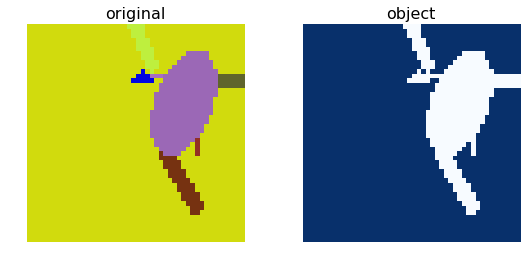

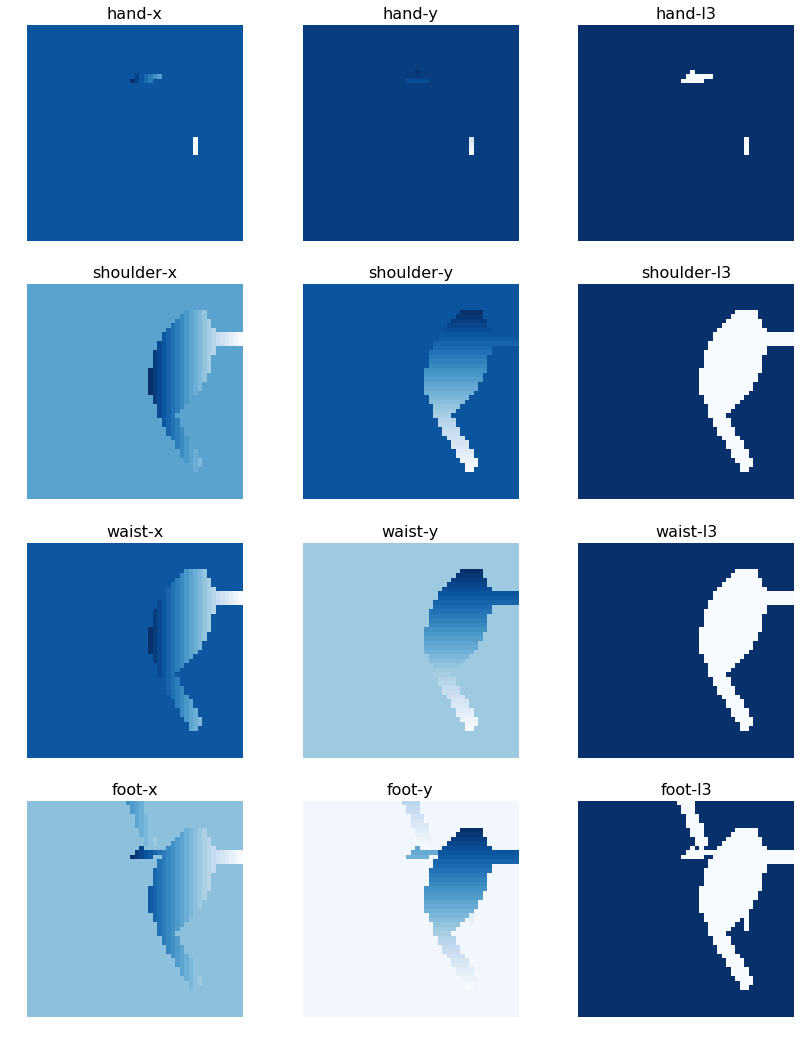

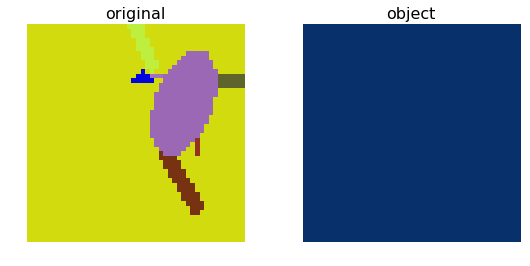

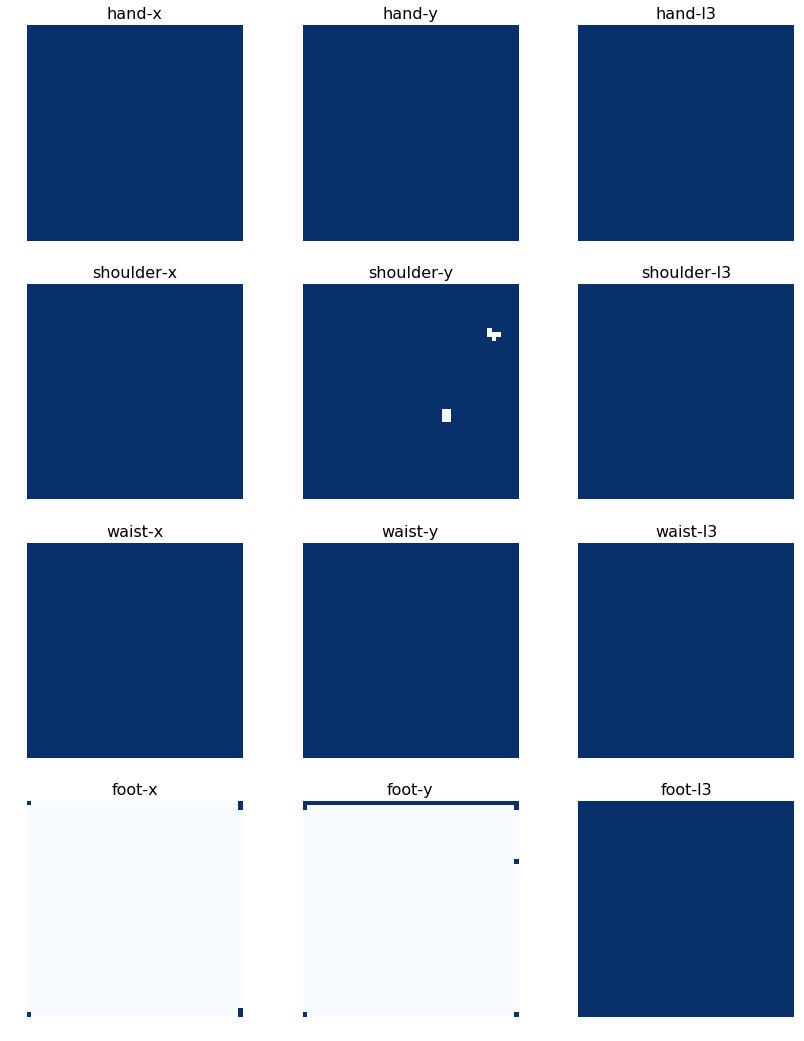

In [19]:
compare()

In [9]:
def compare():
    # build dataset
    batch_size = 1
    height = 48
    width = 48
    dataset = TestDataGenerator(PuppetDataset, 4, batch_size, height=height,
                                width=width)
    # generate data
    image_group, guide_mask_group, annkp_group = dataset.next()
    predict_mask_group = model.predict_on_batch(image_group)[-1]
    for x in range(batch_size):
        image = image_group[x]
        # select last level see, and unuse other level
        true_mask = guide_mask_group[x][-1]
        display_my_masks(image, true_mask)
        # select last level see, and unuse other level
        predict_mask = predict_mask_group[x, :, :, :]
        display_my_masks(image, predict_mask)

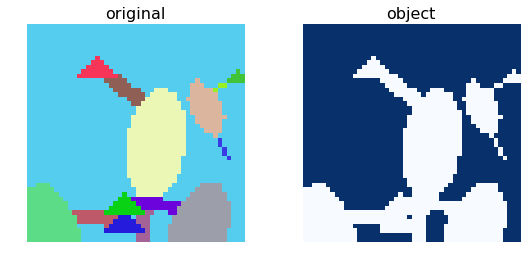

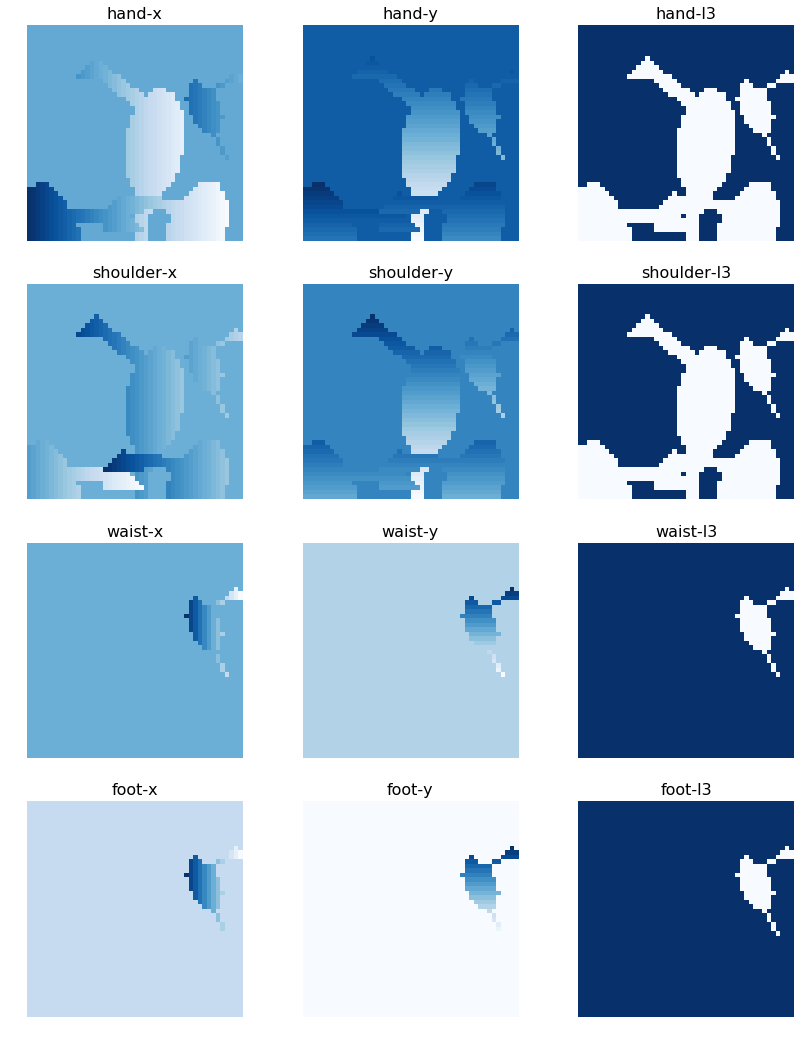

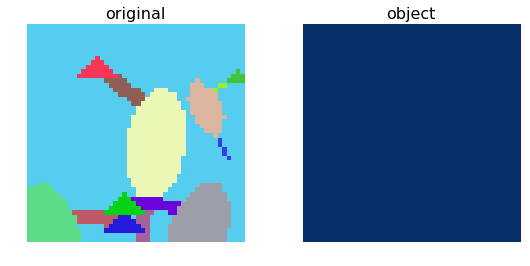

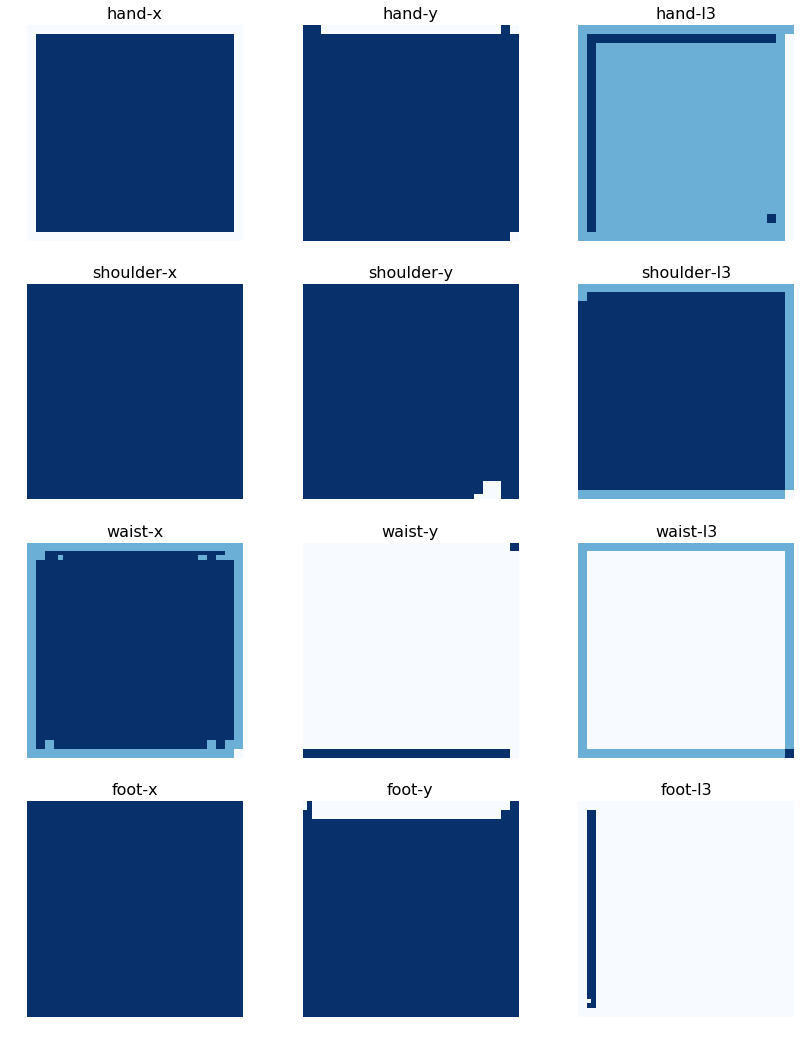

In [10]:
compare()